<a href="https://colab.research.google.com/github/BerkSpar/sir_model/blob/master/sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importação de bibliotecas
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    
    return([dS_dt, dI_dt, dR_dt])

In [0]:
#Configurando valores
S0 = 0.7
I0 = 0.2
R0 = 0
beta = 0.3
gamma =0.2

#Vetor de tempo
t = np.linspace (0, 100, 10000)

#Resultado
solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args = (beta, gamma))
solution = np.array(solution)

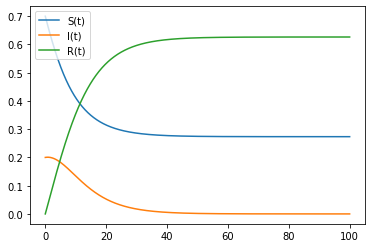

In [0]:
#Plotar resultado
plt.figure(figsize=[6, 4])
plt.plot(t, solution[:, 0], label = "S(t)")
plt.plot(t, solution[:, 1], label = "I(t)")
plt.plot(t, solution[:, 2], label = "R(t)")
plt.legend()
plt.show()